In [73]:
import pickle
import numpy as np
from sklearn.preprocessing import RobustScaler,MinMaxScaler
X_ppg,X_qual,X_acc,y_rr,y_respiration,y_inspiration,y_expiration,groups,X_respiration,y_activity,y_label = pickle.load(open('../../affect-recognition/data/tabular_data_8.p','rb'))

In [74]:
from sklearn.preprocessing import OneHotEncoder
index = np.where((y_activity!=0)&(y_activity!=3)&(y_activity!=6)&(y_activity!=8))[0]
X_acc = X_acc[index]
y_activity = y_activity[index]
groups = groups[index]
y_activity = OneHotEncoder().fit_transform(y_activity.reshape(-1,1)).todense()

In [75]:
X_fft = np.fft.fft(X_acc[:,:,:],axis=1)
X_fft_real = X_fft.real
X_fft_imag = X_fft.imag
X_fft = np.concatenate([X_fft_real,X_fft_imag],axis=2)
max_value = X_fft.max()
X_fft = X_fft/max_value
X_fft.shape,X_acc.shape
max_value = X_acc.max()
X_acc = X_acc/max_value

Model: "model_178"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_237 (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
reshape_355 (Reshape)           (None, 1, 5)         0           input_237[0][0]                  
__________________________________________________________________________________________________
lambda_1147 (Lambda)            (None, 1, 1, 5)      0           reshape_355[0][0]                
__________________________________________________________________________________________________
conv2d_transpose_574 (Conv2DTra (None, 1, 1, 32)     1632        lambda_1147[0][0]                
__________________________________________________________________________________________

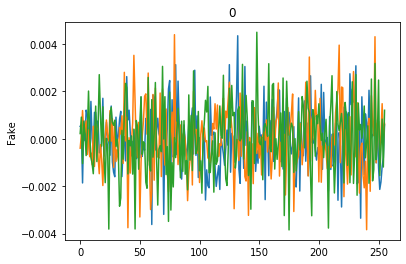

>1, >0,>178, c1=-0.180, c2=0.033 g=0.063
>1, >1,>178, c1=-0.152, c2=0.033 g=0.065
>1, >2,>178, c1=-0.141, c2=0.033 g=0.066
>1, >3,>178, c1=-0.135, c2=0.034 g=0.064
>1, >4,>178, c1=-0.135, c2=0.034 g=0.063
>1, >5,>178, c1=-0.135, c2=0.034 g=0.064
>1, >6,>178, c1=-0.136, c2=0.034 g=0.064
>1, >7,>178, c1=-0.138, c2=0.034 g=0.068
>1, >8,>178, c1=-0.140, c2=0.035 g=0.065
>1, >9,>178, c1=-0.142, c2=0.035 g=0.067


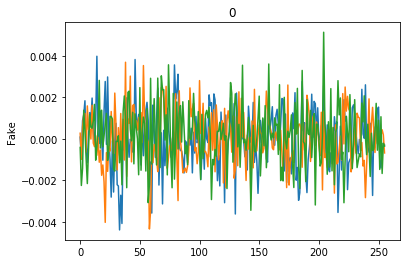

>1, >10,>178, c1=-0.144, c2=0.035 g=0.074
>1, >11,>178, c1=-0.146, c2=0.036 g=0.071
>1, >12,>178, c1=-0.148, c2=0.036 g=0.074
>1, >13,>178, c1=-0.151, c2=0.036 g=0.072
>1, >14,>178, c1=-0.154, c2=0.036 g=0.075
>1, >15,>178, c1=-0.157, c2=0.036 g=0.077
>1, >16,>178, c1=-0.159, c2=0.037 g=0.073
>1, >17,>178, c1=-0.162, c2=0.037 g=0.073
>1, >18,>178, c1=-0.164, c2=0.037 g=0.077
>1, >19,>178, c1=-0.166, c2=0.038 g=0.085
>1, >20,>178, c1=-0.169, c2=0.038 g=0.085
>1, >21,>178, c1=-0.172, c2=0.039 g=0.083
>1, >22,>178, c1=-0.174, c2=0.039 g=0.089
>1, >23,>178, c1=-0.176, c2=0.039 g=0.084
>1, >24,>178, c1=-0.179, c2=0.039 g=0.082
>1, >25,>178, c1=-0.181, c2=0.040 g=0.082
>1, >26,>178, c1=-0.184, c2=0.040 g=0.091
>1, >27,>178, c1=-0.187, c2=0.040 g=0.098
>1, >28,>178, c1=-0.190, c2=0.041 g=0.093
>1, >29,>178, c1=-0.192, c2=0.041 g=0.100


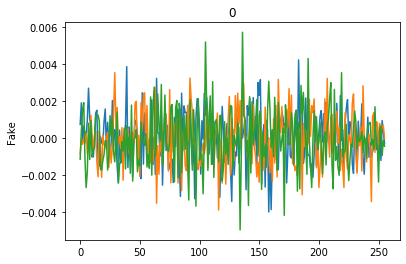

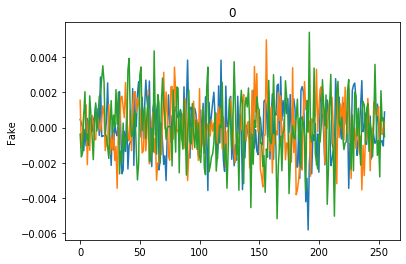

>1, >30,>178, c1=-0.195, c2=0.041 g=0.097
>1, >31,>178, c1=-0.198, c2=0.042 g=0.093
>1, >32,>178, c1=-0.201, c2=0.042 g=0.104
>1, >33,>178, c1=-0.203, c2=0.042 g=0.097
>1, >34,>178, c1=-0.206, c2=0.042 g=0.093
>1, >35,>178, c1=-0.208, c2=0.043 g=0.103
>1, >36,>178, c1=-0.211, c2=0.043 g=0.100
>1, >37,>178, c1=-0.214, c2=0.044 g=0.109


KeyboardInterrupt: 

In [78]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
from keras.optimizers import Adam,RMSprop
from keras.models import Model
from keras.layers import Input,GRU,Bidirectional
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten,multiply
from keras.layers import Conv2D,Conv1D,MaxPool1D,BatchNormalization
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate
import warnings
warnings.filterwarnings('ignore')
import keras.backend as K
from keras.layers import Conv2DTranspose, Lambda
from keras.initializers import RandomNormal
from keras.constraints import Constraint
from sklearn.model_selection import StratifiedKFold

# clip model weights to a given hypercube
class ClipConstraint(Constraint):
    # set clip value when initialized
    def __init__(self, clip_value):
        self.clip_value = clip_value

    # clip model weights to hypercube
    def __call__(self, weights):
        return K.clip(weights, -self.clip_value, self.clip_value)

    # get the config
    def get_config(self):
        return {'clip_value': self.clip_value}


def wasserstein_loss(y_true, y_pred):
    return K.mean(y_true * y_pred)


def Conv1DTranspose(input_tensor, filters, kernel_size, strides=1, padding='same'):
    """
        input_tensor: tensor, with the shape (batch_size, time_steps, dims)
        filters: int, output dimension, i.e. the output tensor will have the shape of (batch_size, time_steps, filters)
        kernel_size: int, size of the convolution kernel
        strides: int, convolution step size
        padding: 'same' | 'valid'
    """
    x = Lambda(lambda x: K.expand_dims(x, axis=2))(input_tensor)
    x = Conv2DTranspose(filters=filters, kernel_size=(kernel_size, 1), 
                        strides=(strides, 1), padding=padding,activation='tanh',
                       kernel_initializer='he_normal')(x)
    x = Lambda(lambda x: K.squeeze(x, axis=2))(x)
    return x


def define_discriminator(in_shape=(256,3), n_classes=5):
    const = ClipConstraint(.1)
    in_label = Input(shape=(n_classes,))
    li = Reshape((1,n_classes))(in_label)
    li = Conv1DTranspose(li,32,10)
    li = Conv1DTranspose(li,128,10)
    li = Conv1DTranspose(li,256,10)
    li = Reshape((in_shape[0],1))(li)
    in_image = Input(shape=in_shape)
    merge = Concatenate()([in_image, li])
    fe = Conv1D(100,4, padding='same',activation='linear',kernel_initializer='he_normal',kernel_constraint=const)(merge)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = MaxPool1D(2)(fe)
    fe = Dropout(0.2)(fe)
    fe = Conv1D(100,8,padding='same',kernel_initializer='he_normal',kernel_constraint=const)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = MaxPool1D(2)(fe)
    fe = Conv1D(100,8,padding='same',kernel_initializer='he_normal',kernel_constraint=const)(fe)
    fe = LeakyReLU(alpha=0.2)(fe)
    fe = MaxPool1D(4)(fe)
    fe = Dropout(0.4)(fe)
    fe = Flatten()(fe)
    fe  = Dense(30,kernel_initializer='he_normal',kernel_constraint=const)(fe)
    out_layer = Dense(1, activation='linear',kernel_initializer='he_normal')(fe)
    opt = RMSprop(lr=1e-6)
    model = Model([in_image,in_label],out_layer)
    model.compile(loss=wasserstein_loss, optimizer=opt, metrics=['accuracy'])
    model.summary()
    return model


def define_generator(latent_dim=100, n_classes=5,out_shape=(256,3)):
    in_label = Input(shape=(n_classes,))
    li = Reshape((1,n_classes))(in_label)
    li = Conv1DTranspose(li,32,10)
#     li = LeakyReLU(alpha=0.2)(li)
#     li = Conv1DTranspose(li,64,10)
#     li = LeakyReLU(alpha=0.2)(li)
#     li = Conv1DTranspose(li,128,10)
#     li = LeakyReLU(alpha=0.2)(li)
    li = Conv1DTranspose(li,256,10)
    li = Reshape((out_shape[0],1))(li)
    in_noise = Input(shape=(latent_dim,))
    li1 = Reshape((1,latent_dim))(in_noise)
#     li1 = Conv1DTranspose(li1,32,10)
#     li1 = LeakyReLU(alpha=0.2)(li1)
#     li1 = Conv1DTranspose(li1,64,10)
#     li1 = LeakyReLU(alpha=0.2)(li1)
    li1 = Conv1DTranspose(li1,128,10)
#     li1 = LeakyReLU(alpha=0.2)(li1)
    li1 = Conv1DTranspose(li1,256,10)
    li1 = Reshape((out_shape[0],1))(li1)
    li = Concatenate()([li,li1])
    li = Conv1D(100,40, padding='same',activation='tanh',kernel_initializer='he_normal')(li)
#     li = Dropout(.2)(li)
    li = Conv1D(out_shape[1],50, padding='same',activation='tanh',kernel_initializer='he_normal')(li)
    model = Model([in_noise,in_label],li)
    model.summary()
    return model

def define_gan(g_model, c_model):
    gen_noise, gen_label = g_model.input
    gen_output = g_model(g_model.input)
    c_model.trainable = False
    gan_output = c_model([gen_output, gen_label])
    model = Model([gen_noise, gen_label], gan_output)
    opt = RMSprop(lr=1e-6)
    model.compile(loss=wasserstein_loss, optimizer=opt)
    model.summary()
    return model

def generate_real_samples(dataset, n_samples):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    X, labels = images[ix], labels[ix]
    y = ones((n_samples, 1))
    return [X, labels], y


def generate_latent_points(latent_dim, n_samples, n_classes=5):
    x_input = randn(latent_dim * n_samples)
    x_input = x_input/x_input.max()
    z_input = x_input.reshape(n_samples, latent_dim)
    labels = randint(0, n_classes, n_samples)
    labels = OneHotEncoder().fit_transform(labels.reshape(-1,1)).todense()
    return [z_input, labels]

def generate_fake_samples(generator, latent_dim, n_samples,plot=False):
    z_input, labels_input = generate_latent_points(latent_dim, n_samples)
    images = generator.predict([z_input, labels_input])
    if plot and np.argmax(labels_input[0].reshape(-1))==0:
        plt.figure()
        plt.plot(images[0]*max_value)
        plt.title(np.argmax(labels_input[0].reshape(-1)))
        plt.ylabel('Fake')
        plt.show()
    y = -1*ones((n_samples, 1))
    return [images, labels_input], y

def plot_history(d1_hist, d2_hist, g_hist):
# plot history
    plt.plot(d1_hist, label='crit_real')
    plt.plot(d2_hist, label='crit_fake')
    plt.plot(g_hist, label='gen')
    plt.legend()
    plt.show()
#     plt.savefig('plot_line_plot_loss.png')
#     pyplot.close()

def train(g_model, c_model, gan_model, dataset, latent_dim=100, n_epochs=10, n_batch=128, n_critic=1):
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    indexes = StratifiedKFold(n_splits=bat_per_epo).split(dataset[0],np.argmax(dataset[1],axis=1))
    data_all = [[dataset[0][test],dataset[1][test]] for _,test in indexes]
    half_batch = int(n_batch / 2)
    c1_hist, c2_hist, g_hist = list(), list(), list()
    for i in range(n_epochs):
        c1_tmp, c2_tmp = list(), list()
#         c_model.trainable = True
        for j,data in enumerate(data_all):
            c_model.trainable = True
            for _ in range(n_critic):
                [X_real,label_real], y_real = generate_real_samples(dataset,data[0].shape[0])
#                 X_real,label_real = data
                c_loss1 = c_model.train_on_batch([X_real,label_real], y_real)
                c1_tmp.append(c_loss1)
                if j%10==0:
                    plot=True
                else:
                    plot=False
                [X_fake,label_false], y_fake = generate_fake_samples(g_model, latent_dim,data[0].shape[0],plot)
                c_loss2 = c_model.train_on_batch([X_fake,label_false], y_fake)
                c2_tmp.append(c_loss2)
#             print(g_model.weights[0][0][0][:5])
            c_model.trainable = False
            # prepare points in latent space as input for the generator
            z_input, label_fake = generate_latent_points(latent_dim, n_batch*5)
            # create inverted labels for the fake samples
            y_gan = -1*ones((n_batch*5, 1))
            # update the generator via the critic's error
            g_loss = gan_model.train_on_batch([z_input,label_fake], y_gan)
            g_hist.append(g_loss)
            c1_hist.append(np.mean(c1_tmp))
            c2_hist.append(np.mean(c2_tmp))
#             print(g_model.weights[0][0][0][:5])
            # summarize loss on this batch
            print('>%d, >%d,>%d, c1=%.3f, c2=%.3f g=%.3f' % (i+1,j,len(data_all), c1_hist[-1], c2_hist[-1], g_loss))
            # evaluate the model performance every 'epoch'
            if (i+1) % bat_per_epo == 0:
                summarize_performance(i, g_model, latent_dim)
    # line plots of loss
    plot_history(c1_hist, c2_hist, g_hist)

c_model = define_discriminator()
g_model = define_generator()
gan_model = define_gan(g_model,c_model)

# d_model.optimizer = opt
# d_model.add_loss(wasserstein_loss)
# d_model.add_metric('accuracy')
dataset = [X_acc, y_activity]
train(g_model, c_model, gan_model, dataset, latent_dim=100, n_epochs=10, n_batch=128, n_critic=5)

In [45]:
c_model.weights[0][0][0][:5]

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[-0.04429895,  0.0671236 , -0.04683576,  0.06442928, -0.08445578],
       [ 0.15821798, -0.04040162, -0.06376234,  0.05322482,  0.01867284],
       [-0.05572864,  0.07082803,  0.05174615,  0.02109903,  0.04598693],
       [ 0.03222822,  0.02668047,  0.00503553,  0.03536528,  0.11152425],
       [ 0.06771738, -0.07430615,  0.09174889, -0.04474792,  0.00757073]],
      dtype=float32)>

In [79]:
import tensorflow as tf

In [80]:
import keras.backend as K

In [1]:
import keras
from keras_self_attention import SeqSelfAttention


model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=10000,
                                 output_dim=300,
                                 mask_zero=True))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128,
                                                       return_sequences=True)))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(keras.layers.Dense(units=5))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         439296    
_________________________________________________________________
seq_self_attention_1 (SeqSel (None, None, 256)         16449     
_________________________________________________________________
dense_1 (Dense)              (None, None, 5)           1285      
Total params: 3,457,030
Trainable params: 3,457,030
Non-trainable params: 0
_________________________________________________________________


In [4]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [43]:
import numpy as np  # linear algebra

import os
import matplotlib.pyplot as plt
import math as mt

# model evaluation
from sklearn.model_selection import KFold

from keras.models import Sequential,Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import MaxPooling2D,Multiply,multiply
from keras.layers.convolutional import Conv2D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras import backend as K
from keras.datasets import fashion_mnist

# K.set_image_dim_ordering('th')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

print(K.image_data_format())

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# define path to save model
model_path_cnn = '../../affect-recognition/data/pic1/a.h5'

# training configuration
batch_size = 400
epochs = 150
# prepare callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        mode='max',
        verbose=1),
    ModelCheckpoint(
        model_path_cnn,
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=0)
]

# k-fold configuration
n_splits = 5


def average(numbers):
    """
    Return the sample arithmetic mean of data.
    :param numbers: a list of float
    :return:
    """
    try:
        return float(sum(numbers)) / max(len(numbers), 1)
    except ZeroDivisionError:
        return 0


def sum_of_square_deviation(numbers, mean):
    """
    Return sum of square deviations of sequence data.
    :param numbers: a list of float
    :param mean:
    :return:
    """
    try:
        return float(1 / len(numbers) * sum((x - mean) ** 2 for x in numbers))
    except ZeroDivisionError:
        return 0
from keras_self_attention import SeqSelfAttention,ScaledDotProductAttention

def model_cnn2(num_classes):
    """Convolutional Neural Network

    The network topology can be summarized as follows:

        Convolutional layer with 32 feature maps of size 5×5.
        Pooling layer taking the max over 2*2 patches.
        Convolutional layer with 64 feature maps of size 5×5.
        Pooling layer taking the max over 2*2 patches.
        Convolutional layer with 128 feature maps of size 1×1.
        Pooling layer taking the max over 2*2 patches.
        Flatten layer.
        Fully connected layer with 1024 neurons and rectifier activation.
        Dropout layer with a probability of 50%.
        Fully connected layer with 510 neurons and rectifier activation.
        Dropout layer with a probability of 50%.
        Output layer.

    """
    # create model
#     model = Sequential()
    inputs = Input(shape=(1, 28, 28))
    at1 = SeqSelfAttention(attention_activation='sigmoid')(inputs)
    at1 = multiply([inputs,at1])
    li = Conv2D(32, (5, 5), padding='same', activation='relu')(at1)
#     at1 = SeqSelfAttention(attention_activation='sigmoid')(li)
#     li = multiply([li,at1])
    
#     li = multiply([li,at1])
    li = MaxPooling2D(pool_size=(2, 2), padding='same')(li)
    

    li = Conv2D(64, (5, 5), padding='same', activation='relu')(li)
#     at1 = SeqSelfAttention(attention_activation='sigmoid')(li)
#     li = Multiply()([li,at1])
    li = MaxPooling2D(pool_size=(2, 2), padding='same')(li)

    li = Conv2D(128, (1, 1), padding='same', activation='relu')(li)
#     at1 = SeqSelfAttention(attention_activation='sigmoid')(li)
#     li = Multiply()([li,at1])
    li = MaxPooling2D(pool_size=(2, 2), padding='same')(li)

    li = Flatten()(li)

    li = Dense(1024, activation='relu', kernel_constraint=maxnorm(3))(li)
    li = Dropout(0.5)(li)
    li = Dense(512, activation='relu', kernel_constraint=maxnorm(3))(li)
    li = Dropout(0.5)(li)

    li = Dense(num_classes, activation='softmax')(li)
    model = Model(inputs=[inputs],outputs=[li])
    # Compile model
    lrate = 0.01
    decay = lrate / epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model    


def model_cnn(num_classes):
    """Convolutional Neural Network

    The network topology can be summarized as follows:

        Convolutional layer with 32 feature maps of size 5×5.
        Pooling layer taking the max over 2*2 patches.
        Convolutional layer with 64 feature maps of size 5×5.
        Pooling layer taking the max over 2*2 patches.
        Convolutional layer with 128 feature maps of size 1×1.
        Pooling layer taking the max over 2*2 patches.
        Flatten layer.
        Fully connected layer with 1024 neurons and rectifier activation.
        Dropout layer with a probability of 50%.
        Fully connected layer with 510 neurons and rectifier activation.
        Dropout layer with a probability of 50%.
        Output layer.

    """
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(64, (5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Conv2D(128, (1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

    model.add(Flatten())

    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    lrate = 0.01
    decay = lrate / epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model




def main():
    #########################################################
    # DATA PREPARATION
    # The train set has 60k rows and 784 columns, so its shape is (60k,784).
    # Each row is a 28 by 28 pixel picture.
    # I will reshape the train set to have (60k,1) shape, i.e. each row will contain a 28 by 28 matrix of pixel color values.
    # Same for the test set.
    #########################################################
    # get data
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    print('train shape: {}'.format(x_train.shape))
    print('test shape: {}'.format(x_test.shape))
    
    unique, counts = np.unique(y_train, return_counts=True)
    print(dict(zip(unique, counts)))

    y_train_CNN = y_train  # only labels i.e targets digits
    X_train_CNN = x_train.reshape(x_train.shape[0], 1, 28, 28).astype(np.uint8)
    print('train shape after reshape: {}'.format(X_train_CNN.shape))

    y_test_CNN = y_test  # only labels i.e targets digits
    X_test_CNN = x_test.reshape(x_test.shape[0], 1, 28, 28).astype(np.uint8)
    print('test shape after reshape: {}'.format(X_test_CNN.shape))

    # normalize inputs from 0-255 to 0-1
    X_train_CNN = X_train_CNN / 255
    X_test_CNN = X_test_CNN / 255

    # one hot encode outputs
    y_train_CNN = to_categorical(y_train_CNN)
    y_test_CNN = to_categorical(y_test_CNN)
    num_classes = y_train_CNN.shape[1]

    X_train = X_train_CNN
    X_val = X_test_CNN
    y_train = y_train_CNN
    y_val = y_test_CNN

    #########################################################
    # BUILDE THE MODEL AND EVALUATE IT USING K-FOLD
    #########################################################

#     kf = KFold(n_splits=n_splits, random_state=seed, shuffle=True)
#     kf.get_n_splits(X_train)

#     acc_scores = list()

#     for fold, (train_index, test_index) in enumerate(kf.split(X_train)):
#         print('\n Fold %d' % (fold))

#         X_tr, X_v = X_train[train_index], X_train[test_index]
#         y_tr, y_v = y_train[train_index], y_train[test_index]
#         # build the model
#         model = model_cnn(num_classes)
#         # fit model
#         model.fit(
#             X_tr,
#             y_tr,
#             epochs=epochs,
#             validation_data=(X_v, y_v),
#             verbose=2,
#             batch_size=batch_size,
#             callbacks=callbacks,
#             shuffle=True
#         )

#         acc = model.evaluate(X_v, y_v, verbose=0)
#         acc_scores.append(acc[1])

#         print('Fold %d: Accuracy %.2f%%' % (fold, acc[1] * 100))

#     print('Accuracy scores: ', acc_scores)

#     mean_acc = average(acc_scores)
#     standard_deviation_acc = mt.sqrt(sum_of_square_deviation(acc_scores, mean_acc))

#     print('=====================')
#     print('Mean Accuracy %f' % mean_acc)
#     print('=====================')
#     print('=====================')
#     print('Stdev Accuracy %f' % standard_deviation_acc)
#     print('=====================')

    model = model_cnn(num_classes)
    model.summary()
#     Fit the final model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size,
                        callbacks=callbacks, verbose=2)

    # Final evaluation of the model
    scores = model.evaluate(X_val, y_val, verbose=0)
    print("Error: %.2f%%" % (100 - scores[1] * 100))
    print("Accuracy: %.2f%%" % (scores[1] * 100))

    # summarize history for accuracy
    fig_acc = plt.figure(figsize=(10, 10))
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
#     fig_acc.savefig("../Output/model_accuracy_fm_cnn.png")


if __name__ == "__main__":
    main()

channels_last
train shape: (60000, 28, 28)
test shape: (10000, 28, 28)
{0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}
train shape after reshape: (60000, 1, 28, 28)
test shape after reshape: (10000, 1, 28, 28)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 1, 28, 32)         22432     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 1, 14, 32)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 1, 14, 64)         51264     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 1, 7, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 1, 7, 128)         8320     

Epoch 64/150
 - 2s - loss: 0.2259 - accuracy: 0.9178 - val_loss: 0.2785 - val_accuracy: 0.9011
Epoch 65/150
 - 2s - loss: 0.2237 - accuracy: 0.9185 - val_loss: 0.2789 - val_accuracy: 0.9021
Epoch 66/150
 - 2s - loss: 0.2225 - accuracy: 0.9192 - val_loss: 0.2767 - val_accuracy: 0.9018
Epoch 67/150
 - 2s - loss: 0.2226 - accuracy: 0.9175 - val_loss: 0.2791 - val_accuracy: 0.9007
Epoch 68/150
 - 2s - loss: 0.2186 - accuracy: 0.9203 - val_loss: 0.2756 - val_accuracy: 0.9031
Epoch 69/150
 - 2s - loss: 0.2172 - accuracy: 0.9199 - val_loss: 0.2775 - val_accuracy: 0.9025
Epoch 70/150
 - 2s - loss: 0.2166 - accuracy: 0.9194 - val_loss: 0.2789 - val_accuracy: 0.9006
Epoch 71/150
 - 2s - loss: 0.2151 - accuracy: 0.9207 - val_loss: 0.2742 - val_accuracy: 0.9021
Epoch 72/150
 - 2s - loss: 0.2137 - accuracy: 0.9206 - val_loss: 0.2761 - val_accuracy: 0.9048
Epoch 73/150
 - 2s - loss: 0.2134 - accuracy: 0.9212 - val_loss: 0.2793 - val_accuracy: 0.9012
Epoch 74/150
 - 2s - loss: 0.2124 - accuracy: 0.92

KeyError: 'acc'

<Figure size 720x720 with 0 Axes>

In [37]:
import keras
from keras_self_attention import SeqSelfAttention


model = keras.models.Sequential()
model.add(keras.layers.Embedding(input_dim=10000,
                                 output_dim=300,
                                 mask_zero=True))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=128,
                                                       return_sequences=True)))
model.add(SeqSelfAttention(attention_activation='sigmoid'))
model.add(keras.layers.Dense(units=5))
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy'],
)
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 256)         439296    
_________________________________________________________________
seq_self_attention_18 (SeqSe (None, None, 256)         16449     
_________________________________________________________________
dense_35 (Dense)             (None, None, 5)           1285      
Total params: 3,457,030
Trainable params: 3,457,030
Non-trainable params: 0
_________________________________________________________________
